### NARALYTIC - GROUP PROJECT

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import bamboolib as bam
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.svm as svm
from sklearn.multioutput import MultiOutputClassifier

In [2]:
nara = pd.read_excel("/Users/damilolaodunuga/Downloads/PC File/ALY 6980/Naralytics Dataset_XN_v2.xlsx", sheet_name = 5)
nara

,Age,Unnamed: 1,Unnamed: 2,Gender,Unnamed: 4,Unnamed: 5,Environment,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 364,Unnamed: 365,Unnamed: 366,Unnamed: 367,Unnamed: 368,Unnamed: 369,Unnamed: 370,Unnamed: 371,Unnamed: 372,Unnamed: 373
0,Age 0_20,Age 21_30,Age 31,Gender_Male,Gender_Female,Gender_Non_Binary,Work,Family,Social,Institution,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,0,0,1,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,0,1,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,0,1,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,0,0,1,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Removing columns and rows with missing values

In [3]:
# Drop columns of index using DataFrame.loc[] and drop() methods.
Naralytic = nara.drop(nara.loc[:, 'Unnamed: 305':'Unnamed: 373'].columns,axis = 1)

# Create a list containing the index numbers you want to remove
index_list = list(range(3005, 5172))

Naralytic.drop(Naralytic.index[index_list], inplace =True)

Naralytic.head()

,Age,Unnamed: 1,Unnamed: 2,Gender,Unnamed: 4,Unnamed: 5,Environment,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303,Positive_Negative_Outcome
0,Age 0_20,Age 21_30,Age 31,Gender_Male,Gender_Female,Gender_Non_Binary,Work,Family,Social,Institution,...,Z_defended_themselves2,X_got_experienced_help2,Z_got_experienced_help2,X_asked_for_advice_from_their_community2,Z_asked_for_advice_from_their_community2,X_talked_to_someone_who_is_affected2,Z_talked_to_someone_who_is_affected2,X_got_someone_else_involved2,Z_got_someone_else_involved2,Positive_Negative_Outcome
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# Re-arrange header
new_header = Naralytic.iloc[0] #grab the first row for the header
Naralytic = Naralytic[1:] #take the data less the header row
Naralytic.columns = new_header #set the header row as the df header
Naralytic.head()

,Age 0_20,Age 21_30,Age 31,Gender_Male,Gender_Female,Gender_Non_Binary,Work,Family,Social,Institution,...,Z_defended_themselves2,X_got_experienced_help2,Z_got_experienced_help2,X_asked_for_advice_from_their_community2,Z_asked_for_advice_from_their_community2,X_talked_to_someone_who_is_affected2,Z_talked_to_someone_who_is_affected2,X_got_someone_else_involved2,Z_got_someone_else_involved2,Positive_Negative_Outcome
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Checking for null values

In [5]:
Naralytic.isnull().values.any()

False

#### Exploratory Data Analysis

In [6]:
# Summary statistics

Naralytic.describe().T

,count,unique,top,freq
0,,,,
Age 0_20,3004,2,0,2363
Age 21_30,3004,2,1,1568
Age 31,3004,2,0,2209
Gender_Male,3004,2,1,1810
Gender_Female,3004,2,0,1822
...,...,...,...,...
X_talked_to_someone_who_is_affected2,3004,2,0,2513
Z_talked_to_someone_who_is_affected2,3004,2,0,2823
X_got_someone_else_involved2,3004,2,0,2690


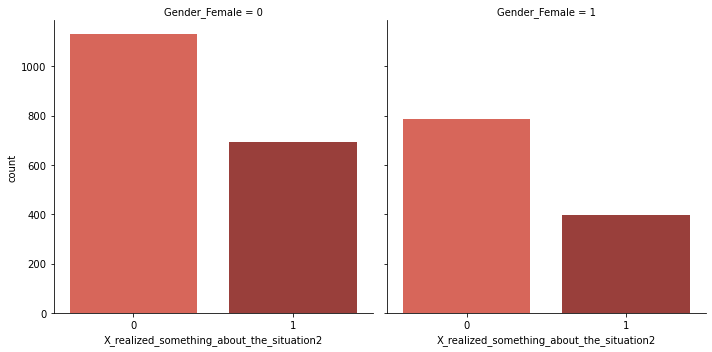

In [7]:
# Barplot of female gender against positive outcome

sns.factorplot(x='X_realized_something_about_the_situation2', col='Gender_Female', kind='count', data=Naralytic, palette = "Reds_d")

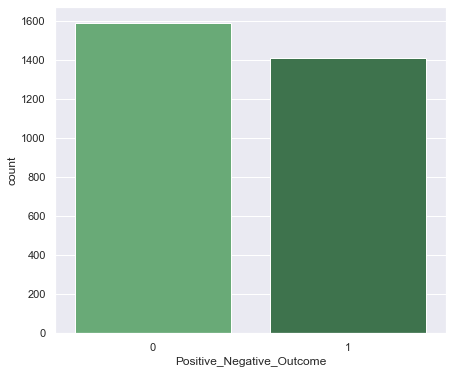

In [8]:
# Positive and Negative outcome barplot
sns.set(rc={'figure.figsize':(7,6)})
sns.countplot(x='Positive_Negative_Outcome', data=Naralytic, palette = 'Greens_d');

<AxesSubplot:xlabel='X_realized_something_about_the_situation2', ylabel='Density'>

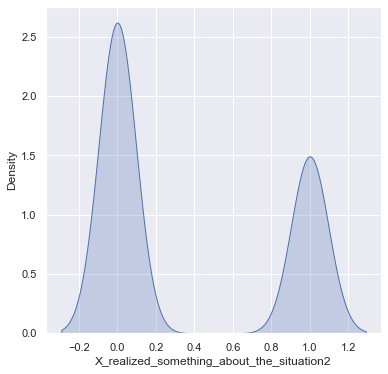

In [9]:
# Density plot of 'Behavior' when X realized something about the situation

sns.set(rc={'figure.figsize':(6,6)})
sns.kdeplot(Naralytic['X_realized_something_about_the_situation2'],shade=True)

#### PART 1: USING BEHAVIOR ELEMENT AND POSITIVE NEGATIVE OUTCOME

#### Creating Independent variables dataframe (main) and dependent variable (target)

In [10]:
# Probability of behavior - dependent and independent

main = Naralytic.drop(Naralytic.loc[:,'X_realized_something_about_the_situation2':'Positive_Negative_Outcome'].columns, axis = 1)
target = Naralytic.loc[:,'X_realized_something_about_the_situation2':'Positive_Negative_Outcome'].astype('string')

main.head()

,Age 0_20,Age 21_30,Age 31,Gender_Male,Gender_Female,Gender_Non_Binary,Work,Family,Social,Institution,...,Security_Societal,Tradition,Conformity_Rules,Conformity_Interpersonal,Humility,Benevolence_Caring,Benevolence_Dependability,Universalism_Concern,Universalism_Nature,Universalism_Tolerance
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,1,1,0,1,0
2,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
target.head()

,X_realized_something_about_the_situation2,Z_realized_something_about_the_situation2,X_figured_out_what_to_do2,Z_figured_out_what_to_do2,X_is_rationalizing_the_situation2,Z_is_rationalizing_the_situation2,X_has_not_figured_it_out_yet2,Z_has_not_figured_it_out_yet2,X_began_or_returned_to_a_relationship_with_Z2,X_began_or_returned_to_a_relationship_with_someone_else2,...,Z_defended_themselves2,X_got_experienced_help2,Z_got_experienced_help2,X_asked_for_advice_from_their_community2,Z_asked_for_advice_from_their_community2,X_talked_to_someone_who_is_affected2,Z_talked_to_someone_who_is_affected2,X_got_someone_else_involved2,Z_got_someone_else_involved2,Positive_Negative_Outcome
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### RANDOM FOREST MODEL: Behavioral Element

In [12]:
# libraries for model and split data

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.svm as svm
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
# Dataset split
main_train, main_test, target_train, target_test = train_test_split(main, target, test_size=0.20)

In [13]:
# shape of train_test split

print('Training data for X:', main_train.shape)
print('Testing data for Y:', target_test.shape)

Training data for X: (2403, 207)
Testing data for Y: (601, 98)


In [14]:
# Build model
forest = RandomForestClassifier(max_depth=5, random_state=0)

# Train the model on training data
rf_model = MultiOutputClassifier(forest)

rf_model.fit(main_train, target_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=5,
                                                       random_state=0))

In [15]:
# Testing the data
rf_predict = rf_model.predict(main_test)


In [16]:
# Printing classification report for first column
print(classification_report(target_test.iloc[:,0], rf_predict[:,0]))


#Print classification report for the second columns in target data
print(classification_report(target_test.iloc[:,1], rf_predict[:,1]))

              precision    recall  f1-score   support

           0       0.67      0.97      0.79       386
           1       0.74      0.13      0.23       215

    accuracy                           0.67       601
   macro avg       0.71      0.55      0.51       601
weighted avg       0.70      0.67      0.59       601

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       555
           1       0.00      0.00      0.00        46

    accuracy                           0.92       601
   macro avg       0.46      0.50      0.48       601
weighted avg       0.85      0.92      0.89       601



Text(0.5, 384.16, 'Predicted')

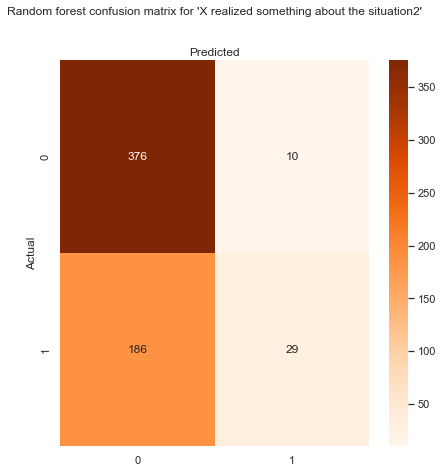

In [17]:
# confusion matrix
random_forest_cf = confusion_matrix(target_test.iloc[:,0], rf_predict[:,0])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(random_forest_cf), annot=True, cmap='Oranges', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Random forest confusion matrix for 'X realized something about the situation2'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 384.16, 'Predicted')

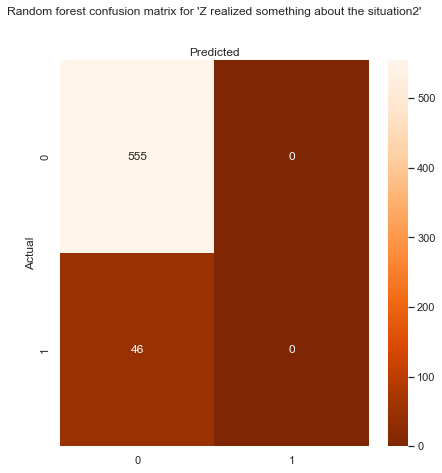

In [18]:
# confusion matrix
random_forest_cf = confusion_matrix(target_test.iloc[:,1], rf_predict[:,1])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(random_forest_cf), annot=True, cmap='Oranges_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Random forest confusion matrix for 'Z realized something about the situation2'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### Hamming loss, Jaccard and Roc_Auc score for "X realized something about the situation2" for random forest

In [19]:
#Import package for metrics

from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import roc_auc_score

In [20]:
# Print score of evaluation metrics

hamming = hamming_loss(target_test.iloc[:,0],rf_predict[:,0])
jaccard = jaccard_score(target_test.iloc[:,0],rf_predict[:,0], average='weighted')
roc = roc_auc_score(target_test.iloc[:,0],rf_predict[:,0])


print('Hamming loss for X_realized_something_about_the_situaion2: ', round(hamming, 3))
print('Jaccard score for X_realized_something_about_the_situaion2: ', round(jaccard, 3))
print('ROC_AUC score for X_realized_something_about_the_situaion2: ', round(roc, 3))

Hamming loss for X_realized_something_about_the_situaion2:  0.326
Jaccard score for X_realized_something_about_the_situaion2:  0.468
ROC_AUC score for X_realized_something_about_the_situaion2:  0.554


#### Hamming loss, Jaccard and Roc_Auc score for "Z realized something about the situation2" for random forest

In [21]:
# Print score of evaluation metrics

hamming_1 = hamming_loss(target_test.iloc[:,1],rf_predict[:,1])
jaccard_1 = jaccard_score(target_test.iloc[:,1],rf_predict[:,1], average='weighted')
roc_1 = roc_auc_score(target_test.iloc[:,1],rf_predict[:,1])


print('Hamming loss for Z_realized_something_about_the_situaion2: ', round(hamming_1, 3))
print('Jaccard score for Z_realized_something_about_the_situaion2: ', round(jaccard_1, 3))
print('ROC_AUC score for Z_realized_something_about_the_situaion2: ', round(roc_1, 3))

Hamming loss for Z_realized_something_about_the_situaion2:  0.077
Jaccard score for Z_realized_something_about_the_situaion2:  0.853
ROC_AUC score for Z_realized_something_about_the_situaion2:  0.5


#### SUPPORT VECTOR MACHINE (SVM) MODEL

In [22]:
#Create a svm Classifier
support_vector = svm.SVC(kernel='linear', random_state = 42) # Linear Kernel

# Build multioutput classification
sv_model = MultiOutputClassifier(support_vector)

In [23]:
#Train the model using the training sets
sv_model.fit(main_train, target_train)

MultiOutputClassifier(estimator=SVC(kernel='linear', random_state=42))

In [24]:
#Predict the response for test dataset
svm_pred = sv_model.predict(main_test)

In [25]:
# Printing classification report for first column
print(classification_report(target_test.iloc[:,0], svm_pred[:,0]))

# Printing classification report for second column
print(classification_report(target_test.iloc[:,1], svm_pred[:,1]))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       386
           1       0.54      0.43      0.48       215

    accuracy                           0.66       601
   macro avg       0.63      0.61      0.62       601
weighted avg       0.65      0.66      0.65       601

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       555
           1       0.39      0.15      0.22        46

    accuracy                           0.92       601
   macro avg       0.66      0.57      0.59       601
weighted avg       0.89      0.92      0.90       601



Text(0.5, 384.16, 'Predicted')

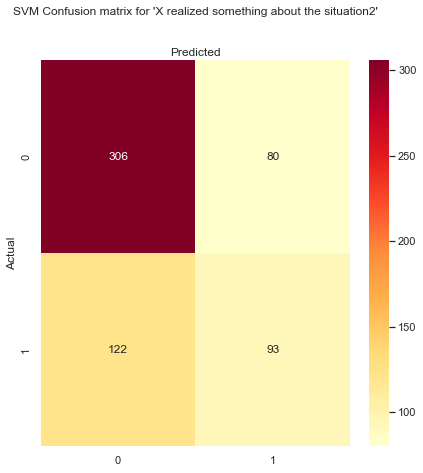

In [26]:
# confusion matrix
svm_cf = confusion_matrix(target_test.iloc[:,0], svm_pred[:,0])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(svm_cf), annot=True, cmap='YlOrRd', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("SVM Confusion matrix for 'X realized something about the situation2'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 384.16, 'Predicted')

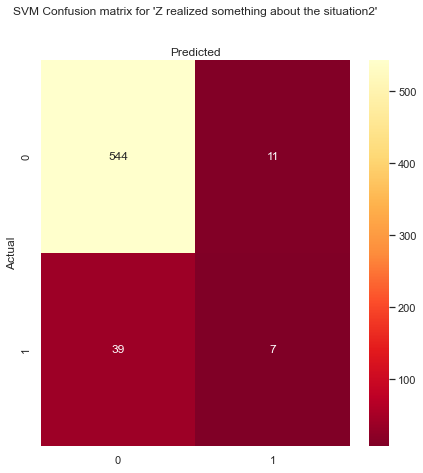

In [27]:
# confusion matrix
svm_cf = confusion_matrix(target_test.iloc[:,1], svm_pred[:,1])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(svm_cf), annot=True, cmap='YlOrRd_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("SVM Confusion matrix for 'Z realized something about the situation2'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### Hamming loss, Jaccard and Roc_Auc score for "X realized something about the situation2" for SVM

In [28]:
# Print evalution metric

svm_hamming = hamming_loss(target_test.iloc[:,0],svm_pred[:,0])
svm_jaccard = jaccard_score(target_test.iloc[:,0],svm_pred[:,0], average='weighted')
svm_roc = roc_auc_score(target_test.iloc[:,0],svm_pred[:,0])


print('Hamming loss for X_realized_something_about_the_situaion2: ', round(svm_hamming, 3))
print('Jaccard score for X_realized_something_about_the_situaion2: ', round(svm_jaccard, 3))
print('ROC_AUC score for X_realized_something_about_the_situaion2: ', round(svm_roc, 3))

Hamming loss for X_realized_something_about_the_situaion2:  0.336
Jaccard score for X_realized_something_about_the_situaion2:  0.5
ROC_AUC score for X_realized_something_about_the_situaion2:  0.613


#### Hamming loss, Jaccard and Roc_Auc score for "Z realized something about the situation2" for SVM

In [29]:
# Print evalution metrics

svm_hamming1 = hamming_loss(target_test.iloc[:,1],svm_pred[:,1])
svm_jaccard1 = jaccard_score(target_test.iloc[:,1],svm_pred[:,1], average='weighted')
svm_roc1 = roc_auc_score(target_test.iloc[:,1],svm_pred[:,1])


print('Hamming loss for Z_realized_something_about_the_situaion2: ', round(svm_hamming1, 3))
print('Jaccard score for Z_realized_something_about_the_situaion2: ', round(svm_jaccard1, 3))
print('ROC_AUC score for Z_realized_something_about_the_situaion2: ', round(svm_roc1, 3))

Hamming loss for Z_realized_something_about_the_situaion2:  0.083
Jaccard score for Z_realized_something_about_the_situaion2:  0.855
ROC_AUC score for Z_realized_something_about_the_situaion2:  0.566


#### DECISION TREE

In [30]:
from sklearn.tree import DecisionTreeClassifier

# fitting decision tree model
decision = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=5, min_samples_split=5,min_samples_leaf=5)   

# Build decision tree model in multioutput
dt_model = MultiOutputClassifier(decision)


In [31]:
# Fitting the model
dt_model.fit(main_train,target_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                       min_samples_leaf=5,
                                                       min_samples_split=5,
                                                       random_state=42))

In [32]:
# predict using target variables
dt_predict = dt_model.predict(main_test)

In [33]:
# Classification report for first column
print(classification_report(target_test.iloc[:,0], dt_predict[:,0]))

# Classification report for second column
print(classification_report(target_test.iloc[:,1], dt_predict[:,1]))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       386
           1       0.51      0.37      0.43       215

    accuracy                           0.65       601
   macro avg       0.60      0.58      0.58       601
weighted avg       0.63      0.65      0.63       601

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       555
           1       0.15      0.07      0.09        46

    accuracy                           0.90       601
   macro avg       0.54      0.52      0.52       601
weighted avg       0.87      0.90      0.88       601



Text(0.5, 384.16, 'Predicted')

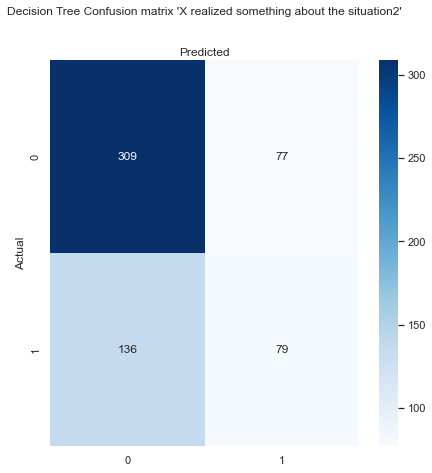

In [34]:
# confusion matrix
decision_cf = confusion_matrix(target_test.iloc[:,0], dt_predict[:,0])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(decision_cf), annot=True, cmap='Blues', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Decision Tree Confusion matrix 'X realized something about the situation2'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 384.16, 'Predicted')

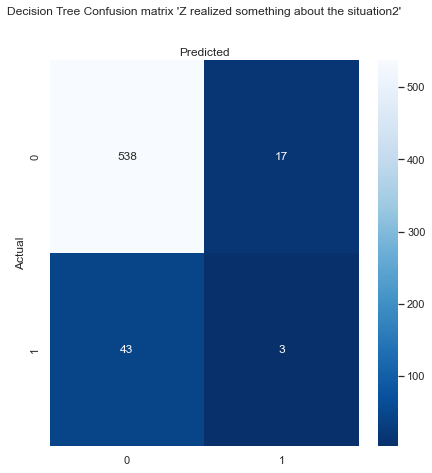

In [35]:
# confusion matrix
decision_cf = confusion_matrix(target_test.iloc[:,1], dt_predict[:,1])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(decision_cf), annot=True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Decision Tree Confusion matrix 'Z realized something about the situation2'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### Hamming loss, Jaccard and Roc_Auc score for "X realized something about the situation2" for Decision tree

In [36]:
# Print evalution metric

dt_hamming = hamming_loss(target_test.iloc[:,0],dt_predict[:,0])
dt_jaccard = jaccard_score(target_test.iloc[:,0],dt_predict[:,0], average='weighted')
dt_roc = roc_auc_score(target_test.iloc[:,0],dt_predict[:,0])


print('Hamming loss for X_realized_something_about_the_situaion2: ', round(dt_hamming, 3))
print('Jaccard score for X_realized_something_about_the_situaion2: ', round(dt_jaccard, 3))
print('ROC_AUC score for X_realized_something_about_the_situaion2: ', round(dt_roc, 3))

Hamming loss for X_realized_something_about_the_situaion2:  0.354
Jaccard score for X_realized_something_about_the_situaion2:  0.477
ROC_AUC score for X_realized_something_about_the_situaion2:  0.584


#### Hamming loss, Jaccard and Roc_Auc score for "Z realized something about the situation2" for Decision tree

In [37]:
# Print evalution metric

dt_hamming1 = hamming_loss(target_test.iloc[:,1],dt_predict[:,1])
dt_jaccard1 = jaccard_score(target_test.iloc[:,1],dt_predict[:,1], average='weighted')
dt_roc1 = roc_auc_score(target_test.iloc[:,1],dt_predict[:,1])


print('Hamming loss for X_realized_something_about_the_situaion2: ', round(dt_hamming1, 3))
print('Jaccard score for X_realized_something_about_the_situaion2: ', round(dt_jaccard1, 3))
print('ROC_AUC score for X_realized_something_about_the_situaion2: ', round(dt_roc1, 3))

Hamming loss for X_realized_something_about_the_situaion2:  0.1
Jaccard score for X_realized_something_about_the_situaion2:  0.834
ROC_AUC score for X_realized_something_about_the_situaion2:  0.517


#### NAIVE BAYES MODEL

In [38]:
from sklearn.naive_bayes import GaussianNB

# Fitting the model
naive_bayes = GaussianNB()

# Build naive bayes model in multioutput classifier
nb_model = MultiOutputClassifier(naive_bayes)

In [39]:
# Fitting the model
nb_model.fit(main_train, target_train)

MultiOutputClassifier(estimator=GaussianNB())

In [40]:
# Predict using test
nb_predict = nb_model.predict(main_test)

In [41]:
# classification report for first column
print(classification_report(target_test.iloc[:,0], nb_predict[:,0]))

# classification report for second column
print(classification_report(target_test.iloc[:,1], nb_predict[:,1]))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64       386
           1       0.43      0.56      0.48       215

    accuracy                           0.58       601
   macro avg       0.57      0.57      0.56       601
weighted avg       0.61      0.58      0.58       601

              precision    recall  f1-score   support

           0       0.98      0.70      0.81       555
           1       0.19      0.85      0.31        46

    accuracy                           0.71       601
   macro avg       0.58      0.77      0.56       601
weighted avg       0.92      0.71      0.78       601



Text(0.5, 384.16, 'Predicted')

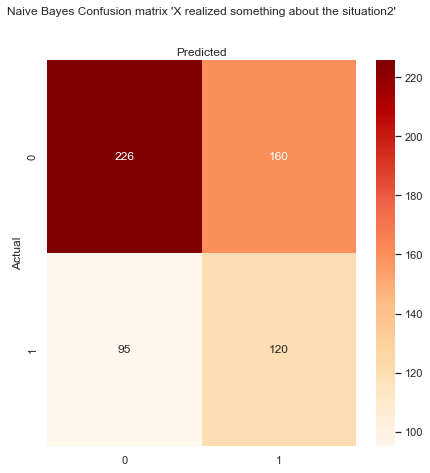

In [42]:
# confusion matrix
naives_cf = confusion_matrix(target_test.iloc[:,0], nb_predict[:,0])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(naives_cf), annot=True, cmap='OrRd', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Naive Bayes Confusion matrix 'X realized something about the situation2'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 384.16, 'Predicted')

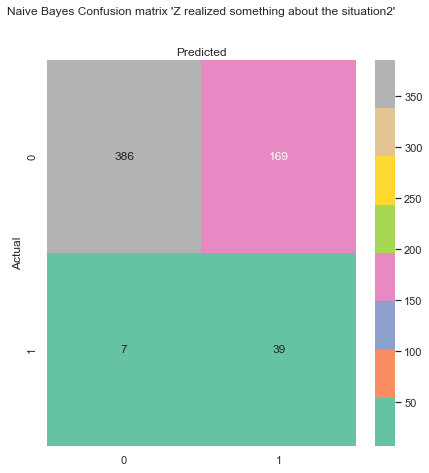

In [43]:
# confusion matrix
naives_cf = confusion_matrix(target_test.iloc[:,1], nb_predict[:,1])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(naives_cf), annot=True, cmap='Set2', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Naive Bayes Confusion matrix 'Z realized something about the situation2'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### Hamming loss, Jaccard and Roc_Auc score for "X realized something about the situation2" for Naive Bayes

In [44]:
# Print evalution metric

nb_hamming = hamming_loss(target_test.iloc[:,0],nb_predict[:,0])
nb_jaccard = jaccard_score(target_test.iloc[:,0],nb_predict[:,0], average='weighted')
nb_roc = roc_auc_score(target_test.iloc[:,0],nb_predict[:,0])


print('Hamming loss for X_realized_something_about_the_situaion2: ', round(nb_hamming, 3))
print('Jaccard score for X_realized_something_about_the_situaion2: ', round(nb_jaccard, 3))
print('ROC_AUC score for X_realized_something_about_the_situaion2: ', round(nb_roc, 3))

Hamming loss for X_realized_something_about_the_situaion2:  0.424
Jaccard score for X_realized_something_about_the_situaion2:  0.416
ROC_AUC score for X_realized_something_about_the_situaion2:  0.572


#### Hamming loss, Jaccard and Roc_Auc score for "Z realized something about the situation2" for Naive Bayes

In [45]:
# Print evalution metric

nb_hamming1 = hamming_loss(target_test.iloc[:,1],nb_predict[:,1])
nb_jaccard1 = jaccard_score(target_test.iloc[:,1],nb_predict[:,1], average='weighted')
nb_roc1 = roc_auc_score(target_test.iloc[:,1],nb_predict[:,1])


print('Hamming loss for X_realized_something_about_the_situaion2: ', round(nb_hamming1, 3))
print('Jaccard score for X_realized_something_about_the_situaion2: ', round(nb_jaccard1, 3))
print('ROC_AUC score for X_realized_something_about_the_situaion2: ', round(nb_roc1, 3))

Hamming loss for X_realized_something_about_the_situaion2:  0.293
Jaccard score for X_realized_something_about_the_situaion2:  0.648
ROC_AUC score for X_realized_something_about_the_situaion2:  0.772


#### PART 2: USING SITUATIONAL ELEMENT

In [46]:
# Probability of situation element - dependent and independent

s_main = Naralytic.drop(Naralytic.loc[:,'X_began_or_returned_to_a_relationship_with_Z':'Z_does_not_know_what_to_do'].columns, axis = 1)
s_target = Naralytic.loc[:,'X_began_or_returned_to_a_relationship_with_Z':'Z_does_not_know_what_to_do'].astype('string')

s_main.head()

,Age 0_20,Age 21_30,Age 31,Gender_Male,Gender_Female,Gender_Non_Binary,Work,Family,Social,Institution,...,Z_defended_themselves2,X_got_experienced_help2,Z_got_experienced_help2,X_asked_for_advice_from_their_community2,Z_asked_for_advice_from_their_community2,X_talked_to_someone_who_is_affected2,Z_talked_to_someone_who_is_affected2,X_got_someone_else_involved2,Z_got_someone_else_involved2,Positive_Negative_Outcome
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
s_target.head()

,X_began_or_returned_to_a_relationship_with_Z,X_is_leaving_the_relationship,Z_is_leaving_the_relationship,X_did_not_try_to_make_the_relationship_work,Z_did_not_try_to_make_the_relationship_work,X_made_Z_feel_uncomfortable,Z_made_X_feel_uncomfortable,X_criticized_and_complained,Z_criticized_and_complained,X_blamed_and_accused,...,X_asked_for_help_and_support,Z_asked_for_help_and_support,X_is_trying_to_understand_the_situation,Z_is_trying_to_understand_the_situation,X_is_figuring_out_what_to_do,Z_is_figuring_out_what_to_do,X_is_rationalizing_the_situation,Z_is_rationalizing_the_situation,X_does_not_know_what_to_do,Z_does_not_know_what_to_do
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [48]:
# Dataset split
s_main_train, s_main_test, s_target_train, s_target_test = train_test_split(s_main, s_target, test_size=0.20)

# shape of train_test split of situational element

print('Training data for X:', s_main_train.shape)
print('Testing data for Y:', s_target_test.shape)

Training data for X: (2403, 168)
Testing data for Y: (601, 137)


#### RANDOM FOREST: Situational Element

In [49]:
# Build model
forest_pt2 = RandomForestClassifier(max_depth=5, random_state=0)

# Train the model on training data
rf_model_pt2 = MultiOutputClassifier(forest_pt2)

rf_model_pt2.fit(s_main_train, s_target_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=5,
                                                       random_state=0))

In [50]:
# Testing the data
rf_predict_pt2 = rf_model_pt2.predict(s_main_test)


In [51]:
# Printing classification report for first column
print(classification_report(s_target_test.iloc[:,0], rf_predict_pt2[:,0]))


#Print classification report for the second columns in target data
print(classification_report(s_target_test.iloc[:,1], rf_predict_pt2[:,1]))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       515
           1       0.00      0.00      0.00        86

    accuracy                           0.86       601
   macro avg       0.43      0.50      0.46       601
weighted avg       0.73      0.86      0.79       601

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       531
           1       0.00      0.00      0.00        70

    accuracy                           0.88       601
   macro avg       0.44      0.50      0.47       601
weighted avg       0.78      0.88      0.83       601



Text(0.5, 384.16, 'Predicted')

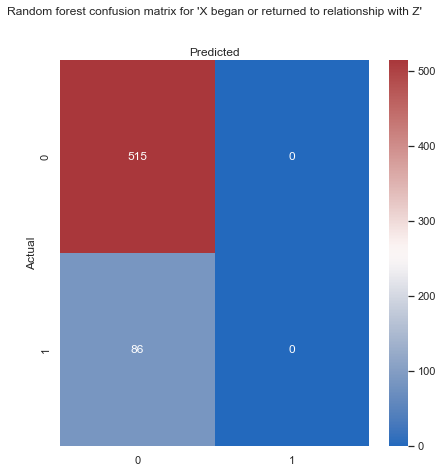

In [52]:
# confusion matrix
random_forest_cf2 = confusion_matrix(s_target_test.iloc[:,0], rf_predict_pt2[:,0])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(random_forest_cf2), annot=True, cmap='vlag', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Random forest confusion matrix for 'X began or returned to relationship with Z'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 384.16, 'Predicted')

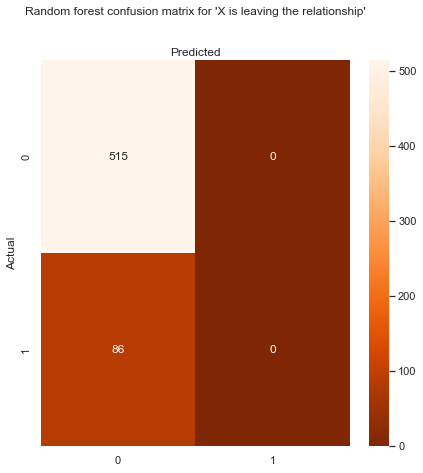

In [53]:
# confusion matrix
random_forest_cf_2 = confusion_matrix(s_target_test.iloc[:,1], rf_predict_pt2[:,1])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(random_forest_cf2), annot=True, cmap='Oranges_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Random forest confusion matrix for 'X is leaving the relationship'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

##### Evaluation metrics for X began or returned to relationship with Z

In [54]:
# Print score of evaluation metrics

hamming2 = hamming_loss(s_target_test.iloc[:,0],rf_predict_pt2[:,0])
jaccard2 = jaccard_score(s_target_test.iloc[:,0],rf_predict_pt2[:,0], average='weighted')
roc2 = roc_auc_score(s_target_test.iloc[:,0],rf_predict_pt2[:,0])


print('Hamming loss for X began or returned to relationship with Z: ', round(hamming2, 3))
print('Jaccard score for X began or returned to relationship with Z: ', round(jaccard2, 3))
print('ROC_AUC score for X began or returned to relationship with Z: ', round(roc2, 3))

Hamming loss for X began or returned to relationship with Z:  0.143
Jaccard score for X began or returned to relationship with Z:  0.734
ROC_AUC score for X began or returned to relationship with Z:  0.5


##### Evaluation metrics for X is leaving the relationship

In [55]:
# Print score of evaluation metrics

hamming_2 = hamming_loss(target_test.iloc[:,1],rf_predict[:,1])
jaccard_2 = jaccard_score(target_test.iloc[:,1],rf_predict[:,1], average='weighted')
roc_2 = roc_auc_score(target_test.iloc[:,1],rf_predict[:,1])


print('Hamming loss for X is leaving the relationship: ', round(hamming_2, 3))
print('Jaccard score for X is leaving the relationship: ', round(jaccard_2, 3))
print('ROC_AUC score for X is leaving the relationship: ', round(roc_2, 3))

Hamming loss for X is leaving the relationship:  0.077
Jaccard score for X is leaving the relationship:  0.853
ROC_AUC score for X is leaving the relationship:  0.5


#### SUPPORT VECTOR MODEL (SVM): Situational Element

In [56]:
#Create a svm Classifier
support_vector_2 = svm.SVC(kernel='linear', random_state = 42) # Linear Kernel

# Build multioutput classification
sv_model_pt2 = MultiOutputClassifier(support_vector_2)

In [57]:
#Train the model using the training sets
sv_model_pt2.fit(s_main_train, s_target_train)

MultiOutputClassifier(estimator=SVC(kernel='linear', random_state=42))

In [58]:
#Predict the response for test dataset
svm_pred_pt2 = sv_model_pt2.predict(s_main_test)

In [59]:
# Printing classification report for first column
print(classification_report(s_target_test.iloc[:,0], svm_pred_pt2[:,0]))

# Printing classification report for second column
print(classification_report(s_target_test.iloc[:,1], svm_pred_pt2[:,1]))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       515
           1       0.45      0.22      0.30        86

    accuracy                           0.85       601
   macro avg       0.67      0.59      0.61       601
weighted avg       0.82      0.85      0.83       601

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       531
           1       0.60      0.30      0.40        70

    accuracy                           0.90       601
   macro avg       0.76      0.64      0.67       601
weighted avg       0.88      0.90      0.88       601



Text(0.5, 384.16, 'Predicted')

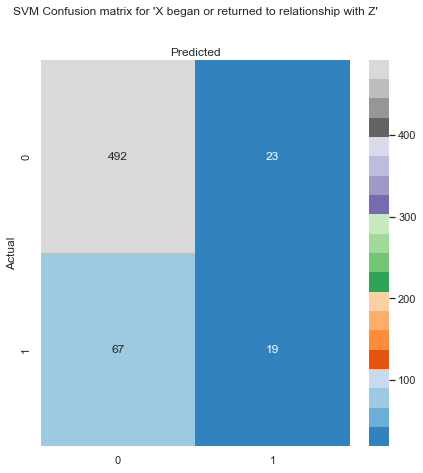

In [60]:
# confusion matrix
svm_cf2 = confusion_matrix(s_target_test.iloc[:,0], svm_pred_pt2[:,0])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(svm_cf2), annot=True, cmap='tab20c', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("SVM Confusion matrix for 'X began or returned to relationship with Z'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 384.16, 'Predicted')

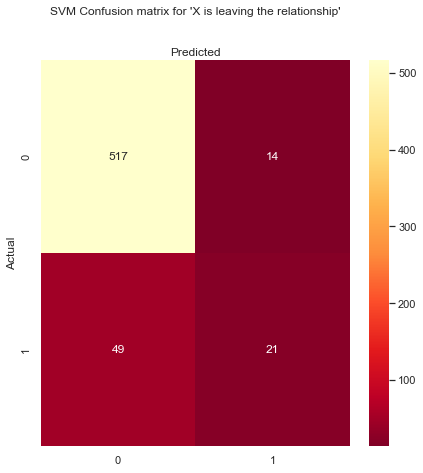

In [61]:
# confusion matrix
svm_cf_2 = confusion_matrix(s_target_test.iloc[:,1], svm_pred_pt2[:,1])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(svm_cf_2), annot=True, cmap='YlOrRd_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("SVM Confusion matrix for 'X is leaving the relationship'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

##### Evaluation metric for X began or returned to a relationship with Z

In [62]:
# Print evalution metric

svm_hamming_1 = hamming_loss(s_target_test.iloc[:,0],svm_pred_pt2[:,0])
svm_jaccard_1 = jaccard_score(s_target_test.iloc[:,0],svm_pred_pt2[:,0], average='weighted')
svm_roc_1 = roc_auc_score(s_target_test.iloc[:,0],svm_pred_pt2[:,0])


print('Hamming loss for X began or returned to a relationship with Z: ', round(svm_hamming_1, 3))
print('Jaccard score for X began or returned to a relationship with Z: ', round(svm_jaccard_1, 3))
print('ROC_AUC score for X began or returned to a relationship with Z: ', round(svm_roc_1, 3))

Hamming loss for X began or returned to a relationship with Z:  0.15
Jaccard score for X began or returned to a relationship with Z:  0.749
ROC_AUC score for X began or returned to a relationship with Z:  0.588


##### Evaluation metrics for X is leaving the relationship

In [63]:
# Print evalution metrics

svm_hamming_2 = hamming_loss(s_target_test.iloc[:,1],svm_pred_pt2[:,1])
svm_jaccard_2 = jaccard_score(s_target_test.iloc[:,1],svm_pred_pt2[:,1], average='weighted')
svm_roc_2 = roc_auc_score(s_target_test.iloc[:,1],svm_pred_pt2[:,1])


print('Hamming loss for X is leaving the relationship: ', round(svm_hamming_2, 3))
print('Jaccard score for X is leaving the relationship: ', round(svm_jaccard_2, 3))
print('ROC_AUC score for X is leaving the relationship: ', round(svm_roc_2, 3))

Hamming loss for X is leaving the relationship:  0.105
Jaccard score for X is leaving the relationship:  0.817
ROC_AUC score for X is leaving the relationship:  0.637


#### DECISION TREE: Situational Element

In [64]:
# fitting decision tree model
decision_2 = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=5, min_samples_split=5,min_samples_leaf=5)   

# Build decision tree model in multioutput
dt_model_pt2 = MultiOutputClassifier(decision_2)


In [65]:
# Fitting the model
dt_model_pt2.fit(s_main_train,s_target_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                       min_samples_leaf=5,
                                                       min_samples_split=5,
                                                       random_state=42))

In [66]:
# predict using target variables
dt_predict_pt2 = dt_model_pt2.predict(s_main_test)

In [67]:
# Classification report for first column
print(classification_report(s_target_test.iloc[:,0], dt_predict_pt2[:,0]))

# Classification report for second column
print(classification_report(s_target_test.iloc[:,1], dt_predict_pt2[:,1]))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       515
           1       0.57      0.24      0.34        86

    accuracy                           0.87       601
   macro avg       0.73      0.61      0.63       601
weighted avg       0.84      0.87      0.84       601

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       531
           1       0.80      0.11      0.20        70

    accuracy                           0.89       601
   macro avg       0.85      0.56      0.57       601
weighted avg       0.88      0.89      0.86       601



Text(0.5, 384.16, 'Predicted')

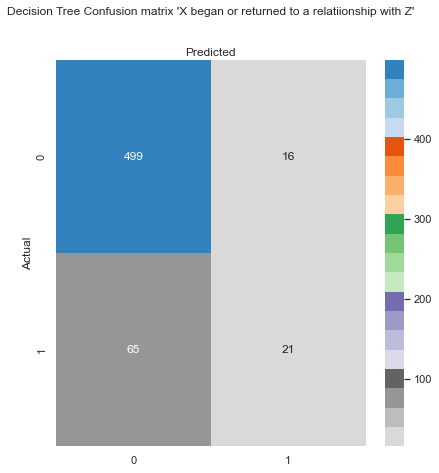

In [68]:
# confusion matrix
decision_cf2 = confusion_matrix(s_target_test.iloc[:,0], dt_predict_pt2[:,0])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(decision_cf2), annot=True, cmap='tab20c_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Decision Tree Confusion matrix 'X began or returned to a relatiionship with Z'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 384.16, 'Predicted')

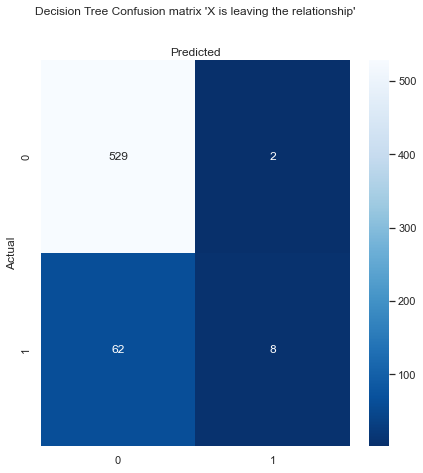

In [69]:
# confusion matrix
decision_cf_2 = confusion_matrix(s_target_test.iloc[:,1], dt_predict_pt2[:,1])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(decision_cf_2), annot=True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Decision Tree Confusion matrix 'X is leaving the relationship'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

##### Evaluation metrics for X began or returned to a relationship with Z

In [70]:
# Print evalution metric

dt_hamming_1 = hamming_loss(s_target_test.iloc[:,0],dt_predict_pt2[:,0])
dt_jaccard_1 = jaccard_score(s_target_test.iloc[:,0],dt_predict_pt2[:,0], average='weighted')
dt_roc_1 = roc_auc_score(s_target_test.iloc[:,0],dt_predict_pt2[:,0])


print('Hamming loss for X began or returned to a relationship with Z: ', round(dt_hamming_1, 3))
print('Jaccard score for X began or returned to a relationship with Z: ', round(dt_jaccard_1, 3))
print('ROC_AUC score for X began or returned to a relationship with Z: ', round(dt_roc_1, 3))

Hamming loss for X began or returned to a relationship with Z:  0.135
Jaccard score for X began or returned to a relationship with Z:  0.767
ROC_AUC score for X began or returned to a relationship with Z:  0.607


##### Evaluation metrics for X is leaving the relationship

In [71]:
# Print evalution metric

dt_hamming_2 = hamming_loss(s_target_test.iloc[:,1],dt_predict_pt2[:,1])
dt_jaccard_2 = jaccard_score(s_target_test.iloc[:,1],dt_predict_pt2[:,1], average='weighted')
dt_roc_2 = roc_auc_score(s_target_test.iloc[:,1],dt_predict_pt2[:,1])


print('Hamming loss for X is leaving the relationship: ', round(dt_hamming_2, 3))
print('Jaccard score for X is leaving the relationship: ', round(dt_jaccard_2, 3))
print('ROC_AUC score for X is leaving the relationship: ', round(dt_roc_2, 3))

Hamming loss for X is leaving the relationship:  0.106
Jaccard score for X is leaving the relationship:  0.801
ROC_AUC score for X is leaving the relationship:  0.555


#### NAIVE BAYES MODEL: Situational Element

In [72]:
# Fitting the model
naive_bayes_2 = GaussianNB()

# Build naive bayes model in multioutput classifier
nb_model_pt2 = MultiOutputClassifier(naive_bayes_2)

In [73]:
# Fitting the model
nb_model_pt2.fit(s_main_train, s_target_train)

MultiOutputClassifier(estimator=GaussianNB())

In [74]:
# Predict using test
nb_predict_pt2 = nb_model_pt2.predict(s_main_test)

In [75]:
# classification report for first column
print(classification_report(s_target_test.iloc[:,0], nb_predict_pt2[:,0]))

# classification report for second column
print(classification_report(s_target_test.iloc[:,1], nb_predict_pt2[:,1]))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73       515
           1       0.25      0.84      0.39        86

    accuracy                           0.62       601
   macro avg       0.60      0.71      0.56       601
weighted avg       0.86      0.62      0.68       601

              precision    recall  f1-score   support

           0       0.96      0.55      0.70       531
           1       0.19      0.81      0.31        70

    accuracy                           0.58       601
   macro avg       0.57      0.68      0.50       601
weighted avg       0.87      0.58      0.65       601



Text(0.5, 384.16, 'Predicted')

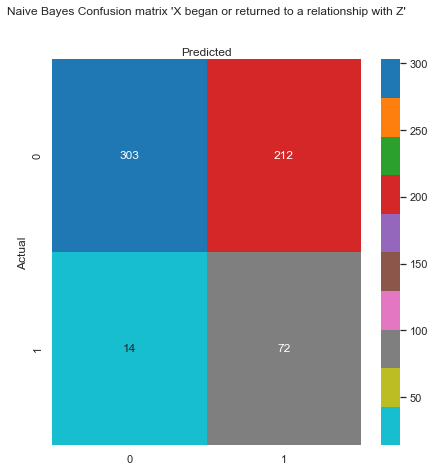

In [76]:
# confusion matrix
naives_cf2 = confusion_matrix(s_target_test.iloc[:,0], nb_predict_pt2[:,0])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(naives_cf2), annot=True, cmap='tab10_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Naive Bayes Confusion matrix 'X began or returned to a relationship with Z'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 384.16, 'Predicted')

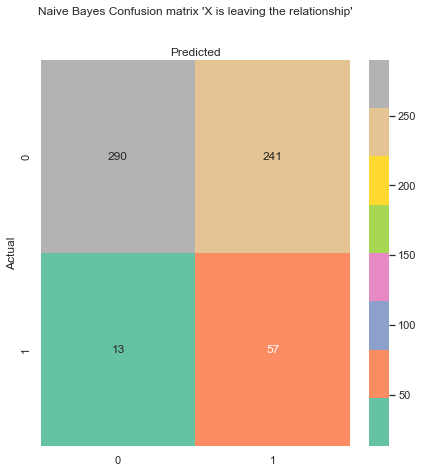

In [77]:
# confusion matrix
naives_cf_2 = confusion_matrix(s_target_test.iloc[:,1], nb_predict_pt2[:,1])

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(naives_cf_2), annot=True, cmap='Set2', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Naive Bayes Confusion matrix 'X is leaving the relationship'", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

##### Evaluation metrics for X began or returned to a relationship with Z

In [78]:
# Print evalution metric

nb_hamming_1 = hamming_loss(s_target_test.iloc[:,0],nb_predict_pt2[:,0])
nb_jaccard_1 = jaccard_score(s_target_test.iloc[:,0],nb_predict_pt2[:,0], average='weighted')
nb_roc_1 = roc_auc_score(s_target_test.iloc[:,0],nb_predict_pt2[:,0])


print('Hamming loss for X began or returned to a relationship with Z: ', round(nb_hamming_1, 3))
print('Jaccard score for X began or returned to a relationship with Z: ', round(nb_jaccard_1, 3))
print('ROC_AUC score for X began or returned to a relationship with Z: ', round(nb_roc_1, 3))

Hamming loss for X began or returned to a relationship with Z:  0.376
Jaccard score for X began or returned to a relationship with Z:  0.525
ROC_AUC score for X began or returned to a relationship with Z:  0.713


##### Evaluation metrics for X is leaving the relationship

In [79]:
# Print evalution metric

nb_hamming_2 = hamming_loss(s_target_test.iloc[:,1],nb_predict_pt2[:,1])
nb_jaccard_2 = jaccard_score(s_target_test.iloc[:,1],nb_predict_pt2[:,1], average='weighted')
nb_roc_2 = roc_auc_score(s_target_test.iloc[:,1],nb_predict_pt2[:,1])


print('Hamming loss for X is leaving the relationship: ', round(nb_hamming_2, 3))
print('Jaccard score for X is leaving the relationship: ', round(nb_jaccard_2, 3))
print('ROC_AUC score for X is leaving the relationship: ', round(nb_roc_2, 3))

Hamming loss for X is leaving the relationship:  0.423
Jaccard score for X is leaving the relationship:  0.492
ROC_AUC score for X is leaving the relationship:  0.68
